# k-means clustering of HbAA and HbAS time series

In [1]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset

### Import time series

    Sample 20% of genes from filtered dataset with 0-containing rows removed
    
    Get indices for gene IDs in replicate data sets

In [72]:
time_series = pd.read_csv("/Users/joe/Jupyter/Sickle-trait_RNA-seq/salmonQuant/data/counts/TPMs_dropVSA.csv", index_col='ORF')

time_series_sub = time_series[(time_series != 0).all(1)]
time_series_sub = time_series_sub.sample(frac=.2, axis = 0)

idx = list(time_series_sub.index)

### Separate strains

In [73]:
# time_series_sub['median'] = time_series_sub.median(axis = 1)
# time_series_sub = time_series_sub[time_series_sub['median'] > 5]
# time_series_sub = time_series_sub.drop(['median'], axis =1)

ts_3D7 = time_series_sub.iloc[:,:64].copy()
ts_FUP = time_series_sub.iloc[:,64:128].copy()

### Separate 3D7 replicates into time series datasets

In [74]:
AA13_3D7 = ts_3D7.iloc[:,:16].copy()
AA13_3D7_sub = AA13_3D7.loc[idx]
AA13_3D7_array = AA13_3D7_sub.to_numpy()
AA13_3D7_data = to_time_series_dataset(AA13_3D7_array)

AA17_3D7 = ts_3D7.iloc[:,16:32].copy()
AA17_3D7_sub = AA17_3D7.loc[idx]
AA17_3D7_array = AA17_3D7_sub.to_numpy()
AA17_3D7_data = to_time_series_dataset(AA17_3D7_array)

AS15_3D7 = ts_3D7.iloc[:,32:48].copy()
AS15_3D7_sub = AS15_3D7.loc[idx]
AS15_3D7_array = AS15_3D7_sub.to_numpy()
AS15_3D7_data = to_time_series_dataset(AS15_3D7_array)

AS16_3D7 = ts_3D7.iloc[:,48:64].copy()
AS16_3D7_sub = AS16_3D7.loc[idx]
AS16_3D7_array = AS16_3D7_sub.to_numpy()
AS16_3D7_data = to_time_series_dataset(AS16_3D7_array)

AA13_FUP = ts_FUP.iloc[:,:16].copy()
AA13_FUP_sub = AA13_FUP.loc[idx]
AA13_FUP_array = AA13_FUP_sub.to_numpy()
AA13_FUP_data = to_time_series_dataset(AA13_FUP_array)

AA17_FUP = ts_FUP.iloc[:,16:32].copy()
AA17_FUP_sub = AA17_FUP.loc[idx]
AA17_FUP_array = AA17_FUP_sub.to_numpy()
AA17_FUP_data = to_time_series_dataset(AA17_FUP_array)

AS18_FUP = ts_FUP.iloc[:,32:48].copy()
AS18_FUP_sub = AS18_FUP.loc[idx]
AS18_FUP_array = AS18_FUP_sub.to_numpy()
AS18_FUP_data = to_time_series_dataset(AS18_FUP_array)

AS19_FUP = ts_FUP.iloc[:,48:64].copy()
AS19_FUP_sub = AS19_FUP.loc[idx]
AS19_FUP_array = AS19_FUP_sub.to_numpy()
AS19_FUP_data = to_time_series_dataset(AS19_FUP_array)

In [28]:
from matplotlib import style 
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D

from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler, TimeSeriesScalerMinMax

### Cluster time series

Text(0.5, 0, 'X 3')

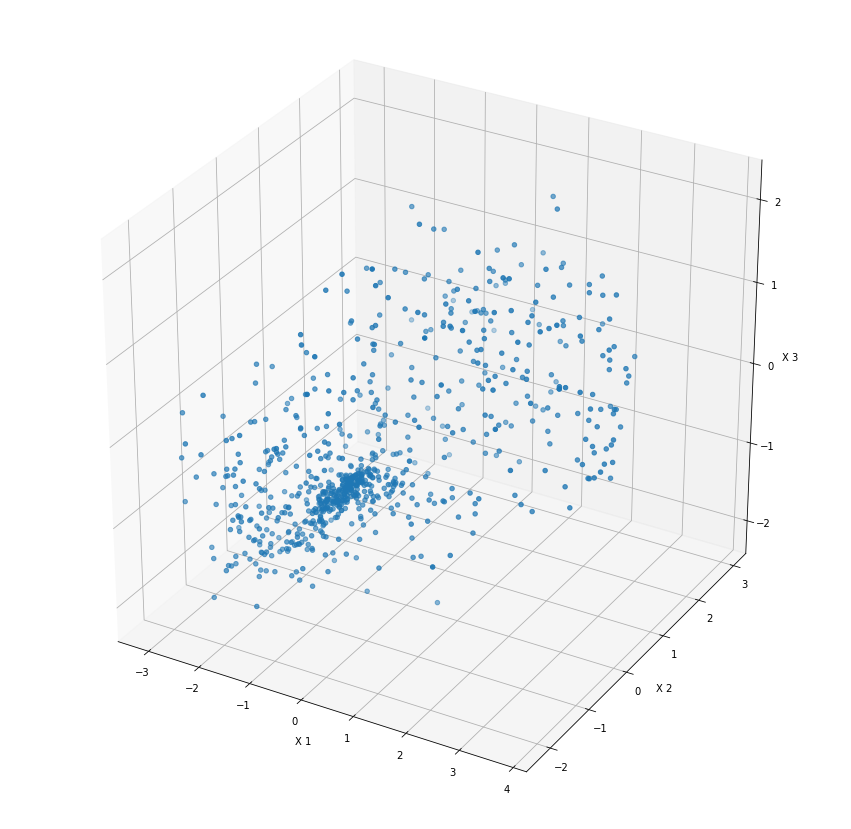

In [29]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_3D7_data)
sz = X_train.shape[1]
X_train.shape

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

xs = X_train[:,0]
ys = X_train[:, 1]
zs = X_train[:, 2]

ax.scatter(xs, ys, zs)

ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')

# plt.savefig('Figures/cluster/cluster_AA13_FUP.png')

### Plot cost against K

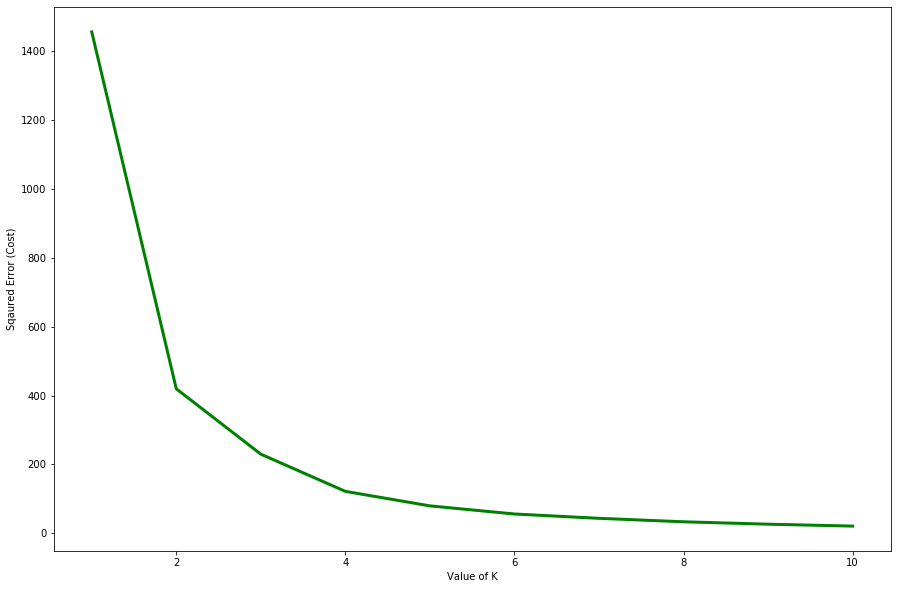

In [30]:
plt.figure(figsize=(15,10))
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 5) 
    KM.fit(X_train[:,0]) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [31]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn import metrics

## k-means clustering and visualization

### 3D7 AA13

In [75]:
k = 12
seed = 0

Euclidean k-means
4.099 --> 3.244 --> 3.123 --> 3.061 --> 3.041 --> 3.029 --> 3.024 --> 3.021 --> 3.019 --> 3.018 --> 3.018 --> 3.018 --> 


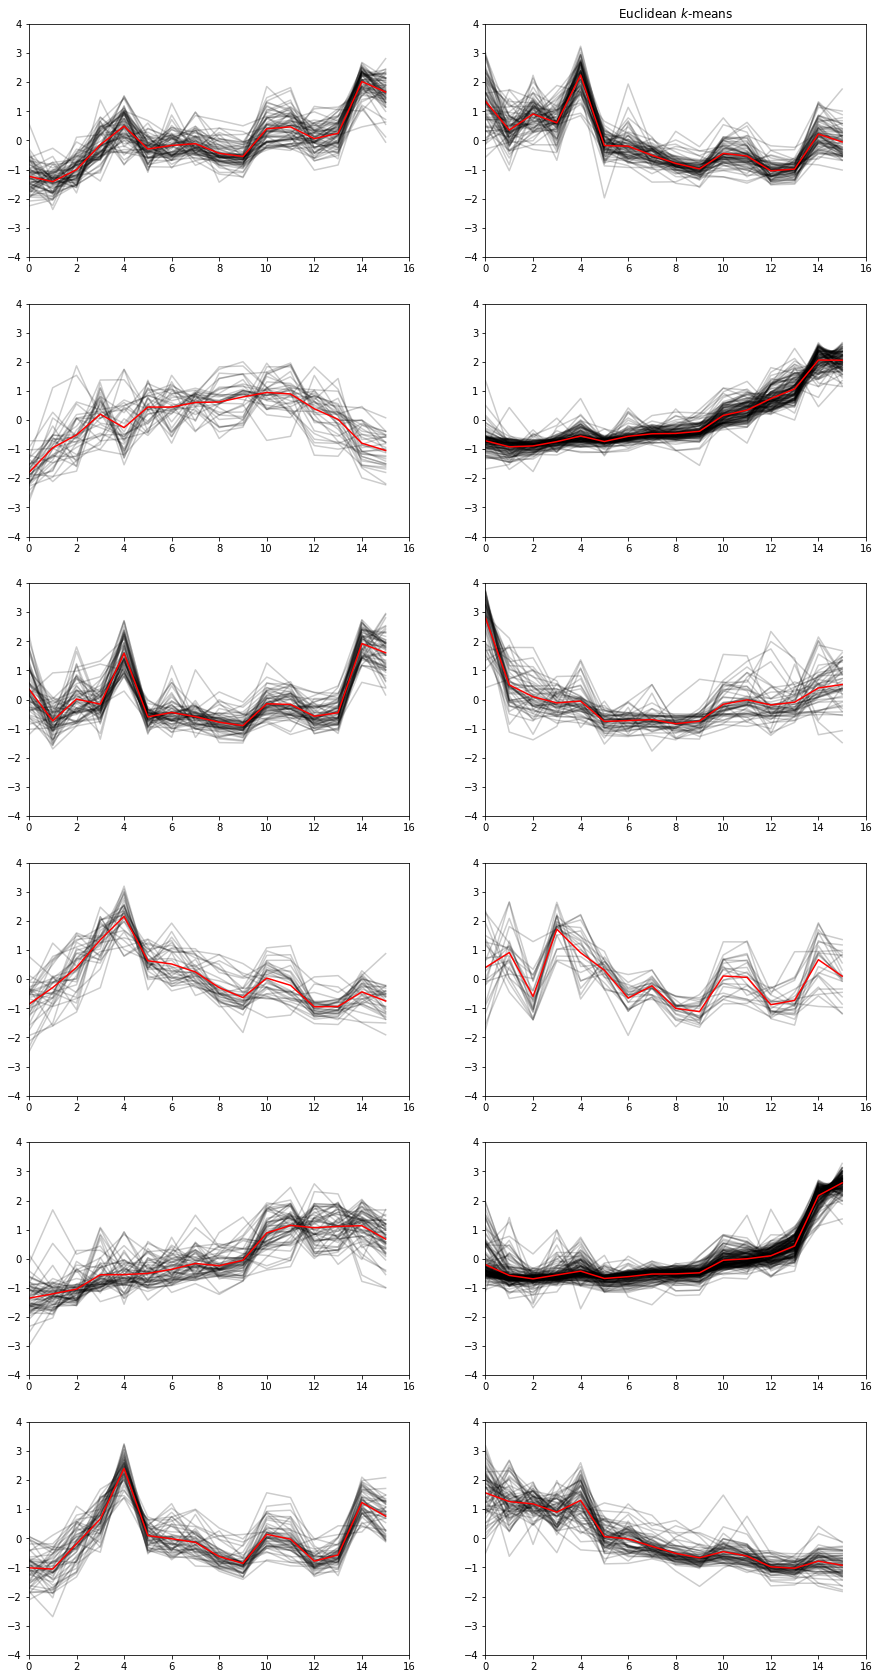

In [77]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_3D7_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')

### 3D7 AA17

Euclidean k-means
4.289 --> 3.432 --> 3.333 --> 3.280 --> 3.243 --> 3.204 --> 3.178 --> 3.166 --> 3.160 --> 3.156 --> 3.154 --> 3.153 --> 3.152 --> 3.151 --> 3.151 --> 3.151 --> 3.151 --> 


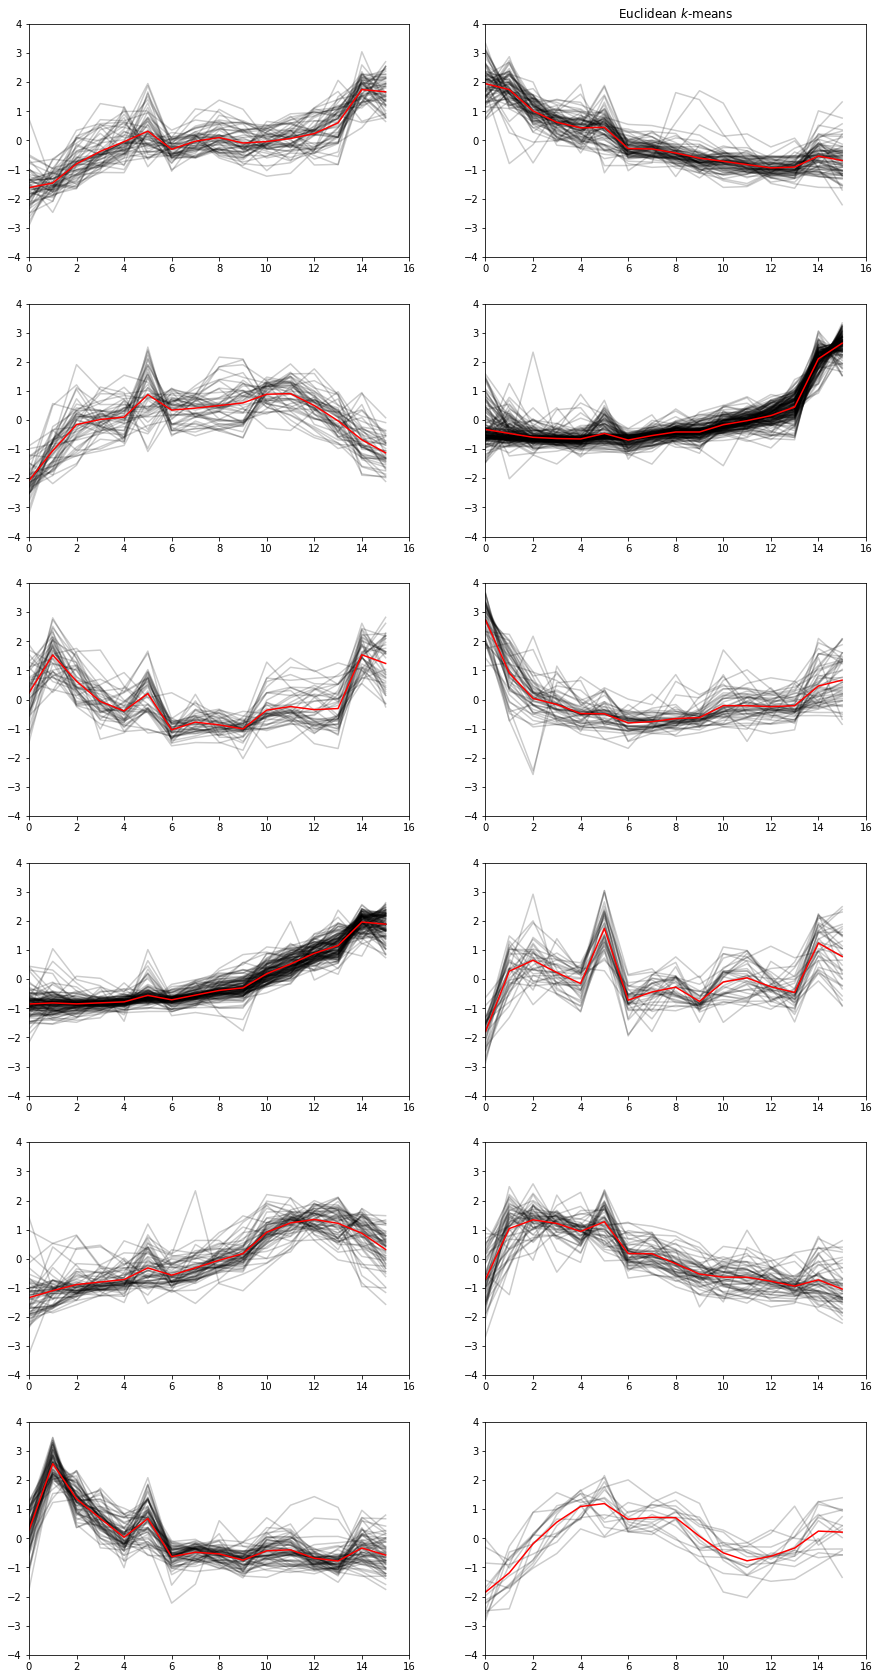

In [78]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA17_3D7_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA17_3D7.png')

### 3D7 AS15

Euclidean k-means
3.972 --> 3.010 --> 2.896 --> 2.822 --> 2.777 --> 2.756 --> 2.743 --> 2.739 --> 2.736 --> 2.736 --> 2.734 --> 2.734 --> 2.734 --> 2.734 --> 


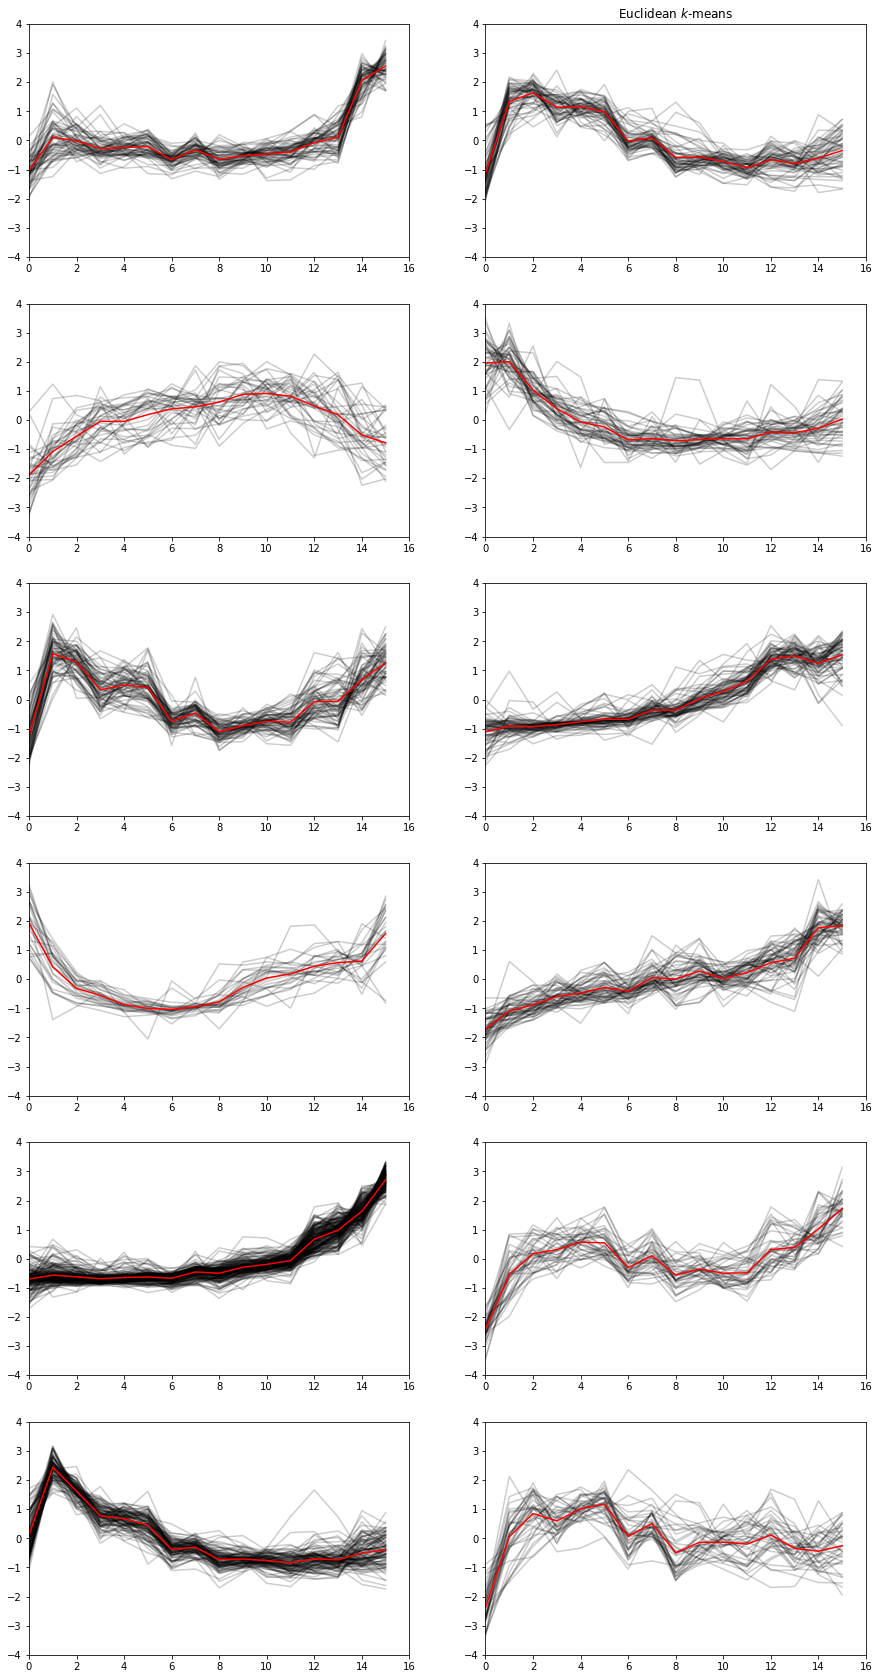

In [79]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS15_3D7_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AS15_3D7.png')

### 3D7 AS16

Euclidean k-means
5.434 --> 3.699 --> 3.533 --> 3.490 --> 3.469 --> 3.454 --> 3.440 --> 3.428 --> 3.423 --> 3.419 --> 3.416 --> 3.413 --> 3.406 --> 3.402 --> 3.402 --> 3.402 --> 3.402 --> 3.401 --> 3.401 --> 


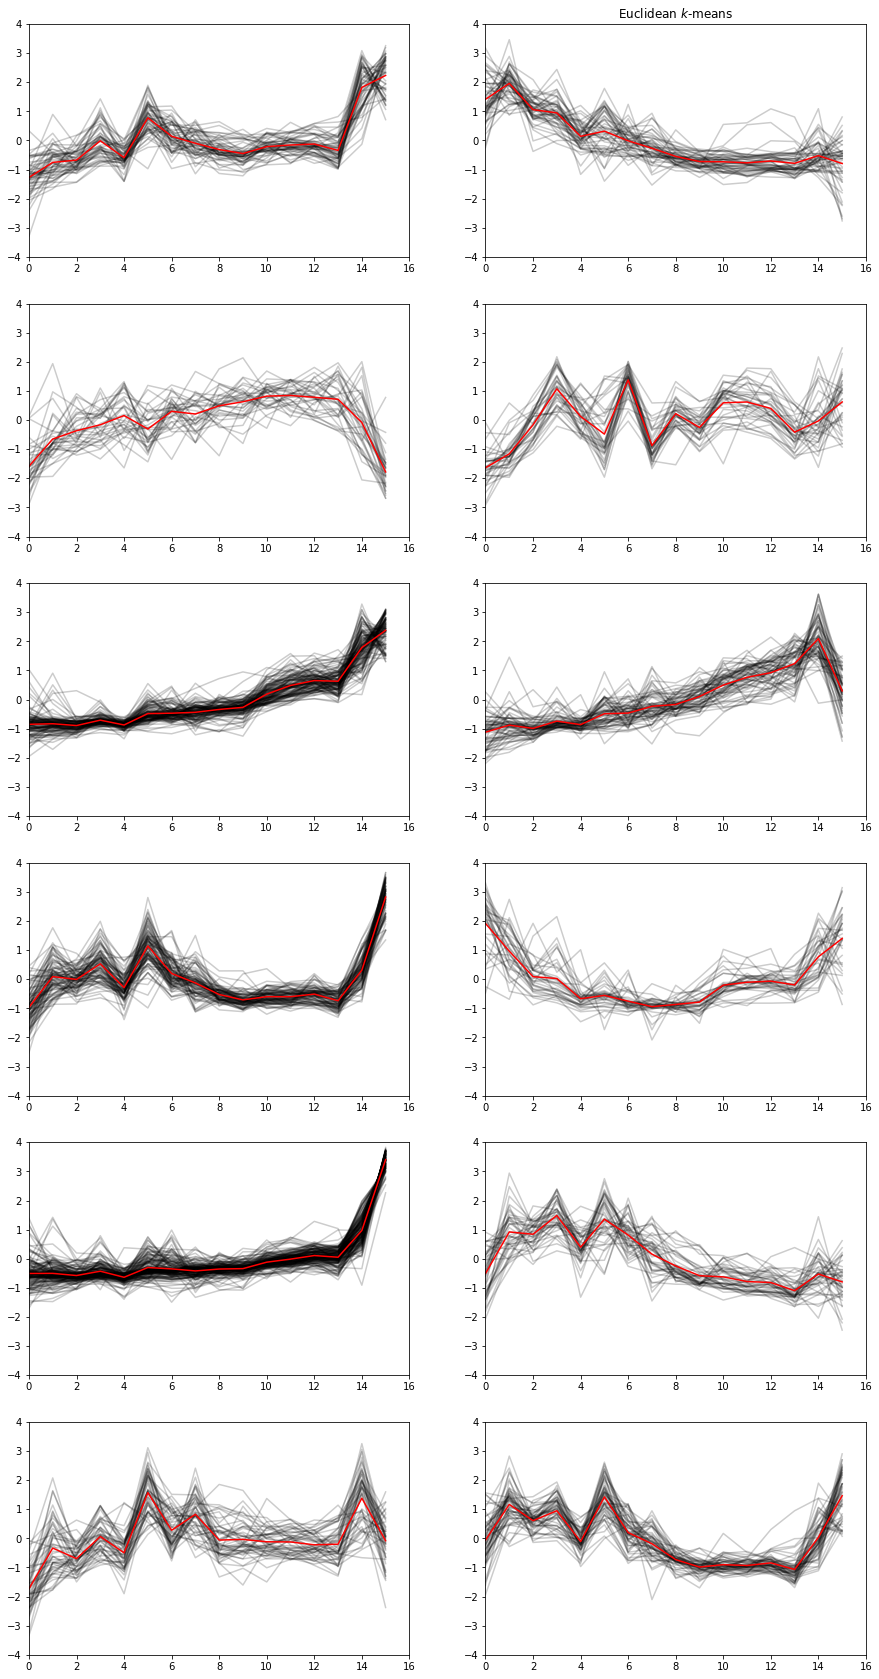

In [80]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS16_3D7_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AS16_3D7.png')

### FUP AA13

Euclidean k-means
4.131 --> 3.178 --> 3.084 --> 3.053 --> 3.026 --> 3.004 --> 2.994 --> 2.992 --> 2.991 --> 2.990 --> 2.988 --> 2.987 --> 2.985 --> 2.985 --> 2.984 --> 2.984 --> 


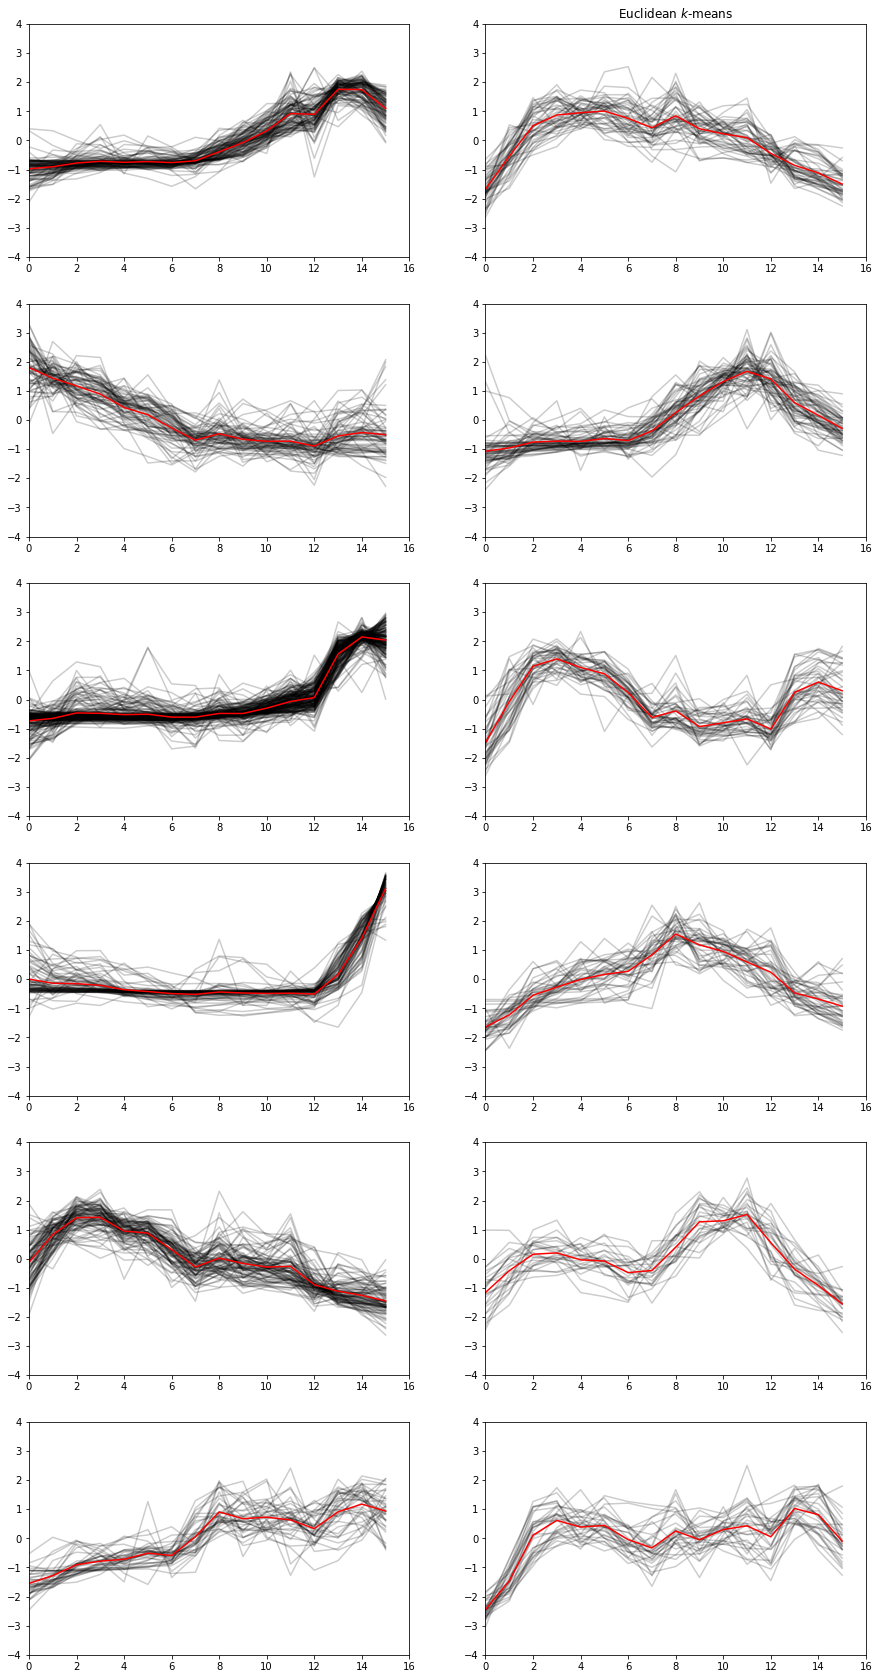

In [81]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_FUP.png')

### FUP AA17

Euclidean k-means
4.009 --> 3.069 --> 2.982 --> 2.916 --> 2.873 --> 2.848 --> 2.832 --> 2.824 --> 2.819 --> 2.816 --> 2.812 --> 2.811 --> 2.810 --> 2.810 --> 


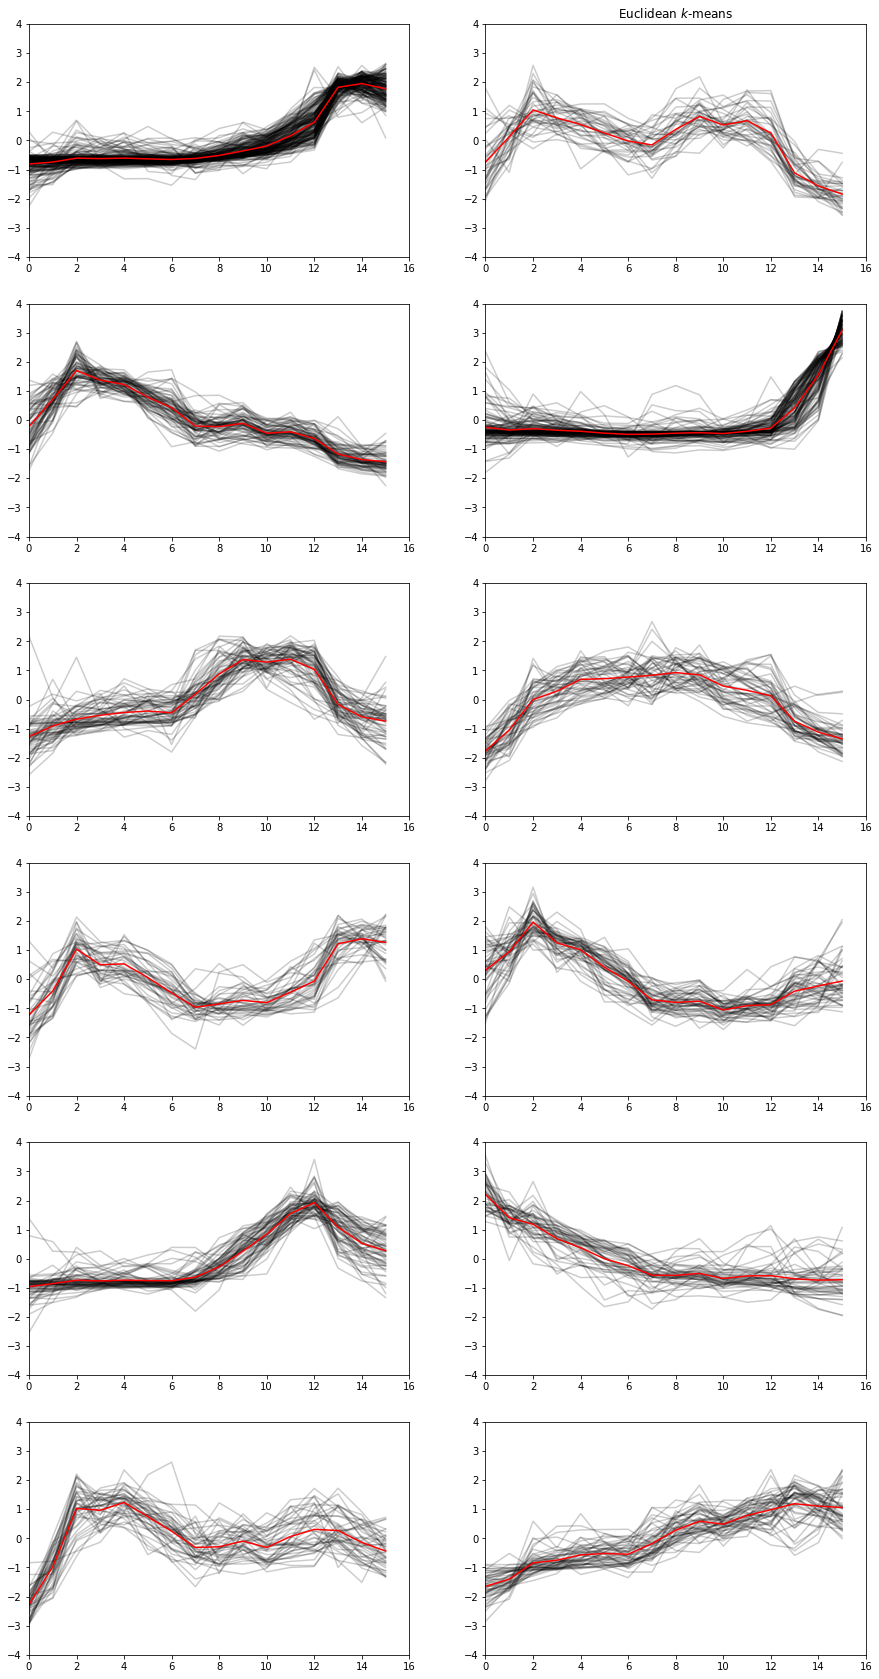

In [82]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA17_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA17_FUP.png')

### FUP AS18

Euclidean k-means
3.807 --> 2.989 --> 2.936 --> 2.919 --> 2.896 --> 2.885 --> 2.878 --> 2.873 --> 2.867 --> 2.860 --> 2.855 --> 2.850 --> 2.839 --> 2.837 --> 2.837 --> 2.835 --> 2.834 --> 2.832 --> 2.832 --> 


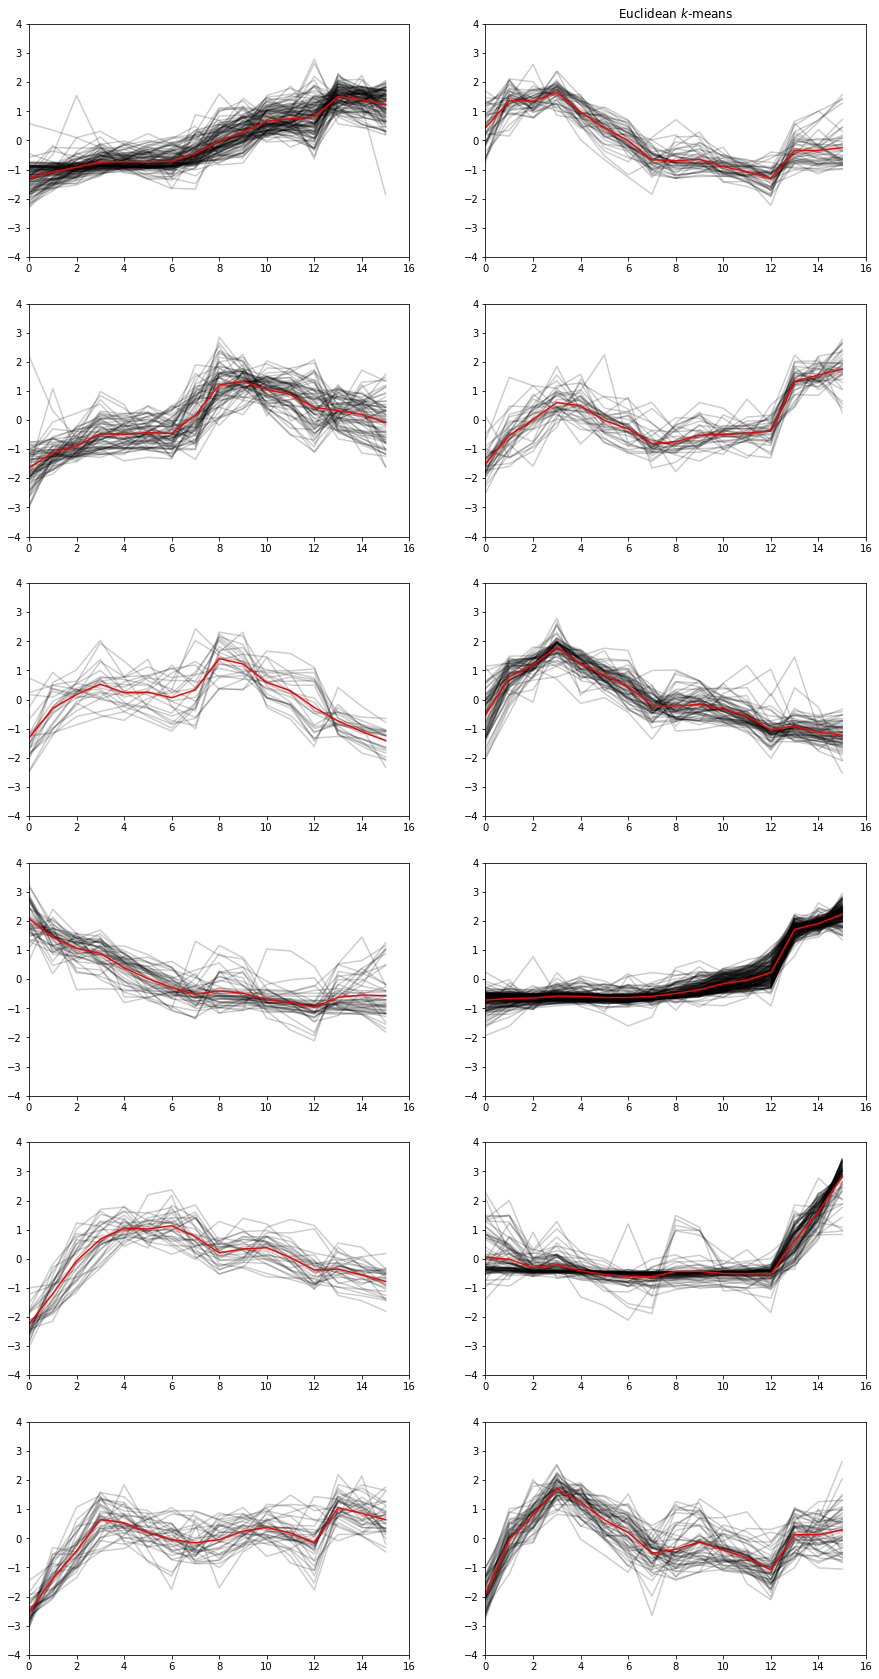

In [83]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS18_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AS18_FUP.png')

### FUP AS19

Euclidean k-means
4.160 --> 3.147 --> 3.022 --> 2.975 --> 2.956 --> 2.938 --> 2.911 --> 2.900 --> 2.896 --> 2.895 --> 2.892 --> 2.890 --> 2.889 --> 2.888 --> 2.887 --> 2.887 --> 


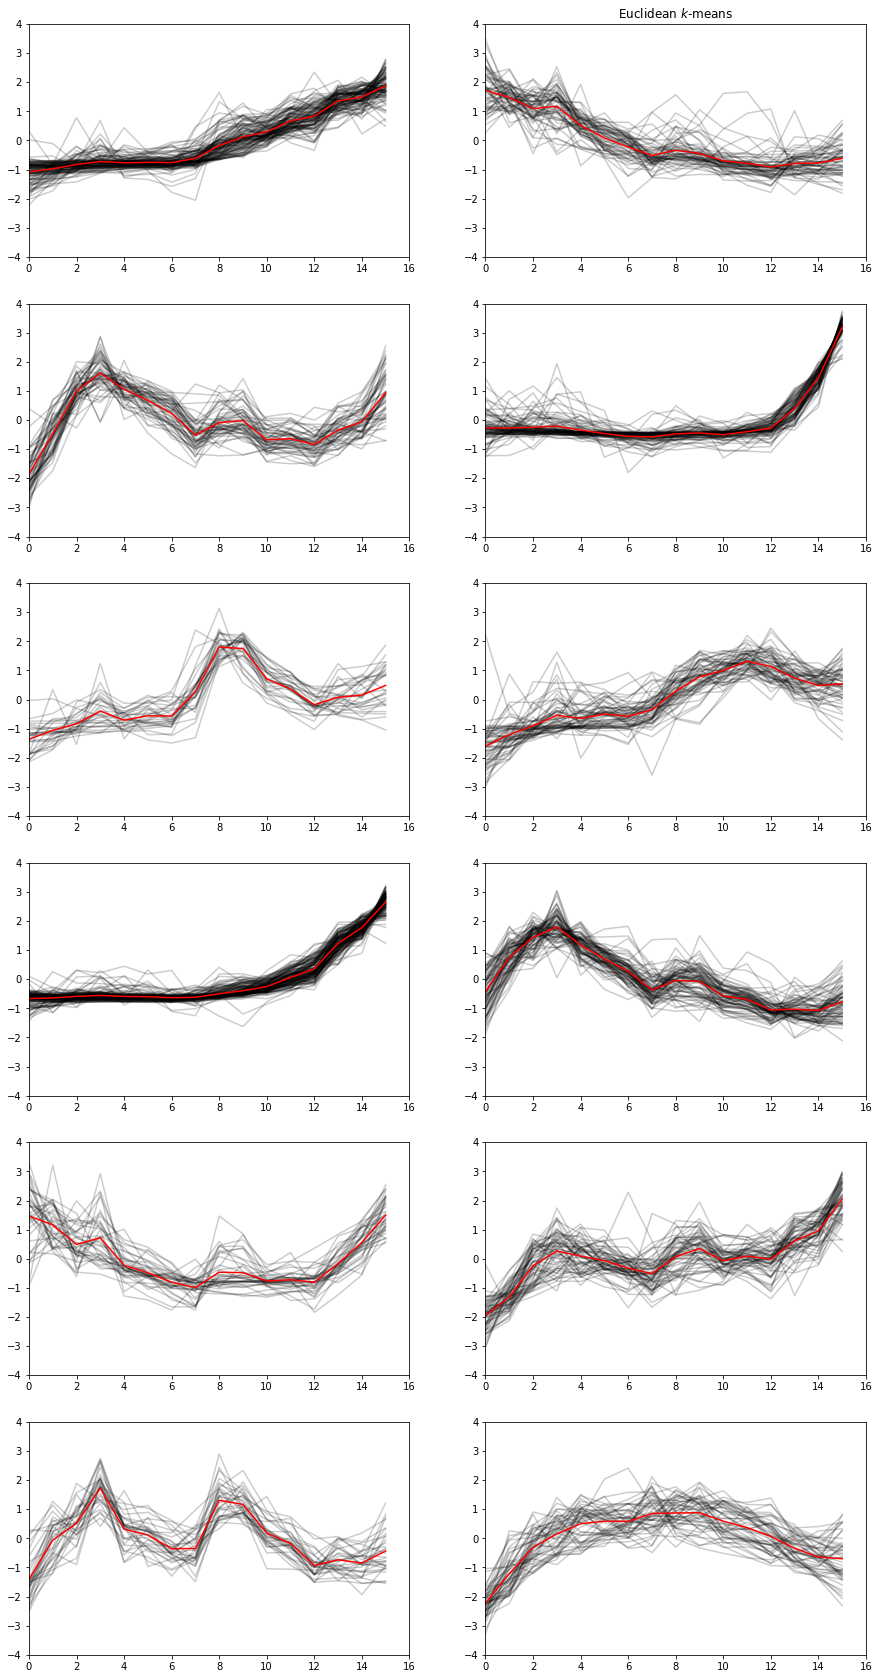

In [84]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS19_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AS19_FUP.png')